In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import sqlite3

In [2]:
db = 'tickets.db'
conn = sqlite3.connect(db)

query = 'select * from ticket_price_log'

df = pd.read_sql(
    query,
    con=conn
)

In [3]:
print(df.shape)

print(df.head(2).T)

(138, 21)
                                                   0                    1
league                                           mlb                  mlb
home_team                          Baltimore Orioles       Boston Red Sox
id                                                25                   21
popularity                                         0                    0
sg_team_name                       baltimore-orioles       boston-red-sox
away_team                            Minnesota Twins    Chicago White Sox
away_popularity                                    0                    0
away_id                                           19                   23
away_sg_team_name                    minnesota-twins    chicago-white-sox
listing_count                                     37                  622
average_price                                   17.0                205.0
lowest_price_good_deals                          9.0                 59.0
lowest_price                

In [4]:
df['event_datetime_local'] = pd.to_datetime(df['event_datetime_local'], format='%Y-%m-%dT%H:%M:%S')
df['event_datetime_utc'] = pd.to_datetime(df['event_datetime_utc'], format='%Y-%m-%dT%H:%M:%S')
df['query_datetime_utc'] = pd.to_datetime(df['query_datetime_utc'], format='%Y-%m-%d %H:%M:%S')

In [5]:
df['advance'] = (df['event_datetime_utc'] - df['query_datetime_utc']).dt.days

In [6]:
df.head(2).T

,0,1
league,mlb,mlb
home_team,Baltimore Orioles,Boston Red Sox
id,25,21
popularity,0,0
sg_team_name,baltimore-orioles,boston-red-sox
away_team,Minnesota Twins,Chicago White Sox
away_popularity,0,0
away_id,19,23
away_sg_team_name,minnesota-twins,chicago-white-sox
listing_count,37,622


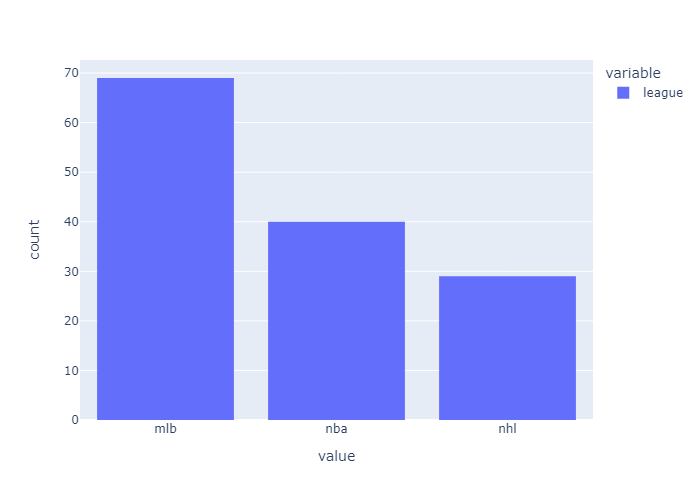

In [7]:
px.histogram(
    df['league']
).show(renderer='png')

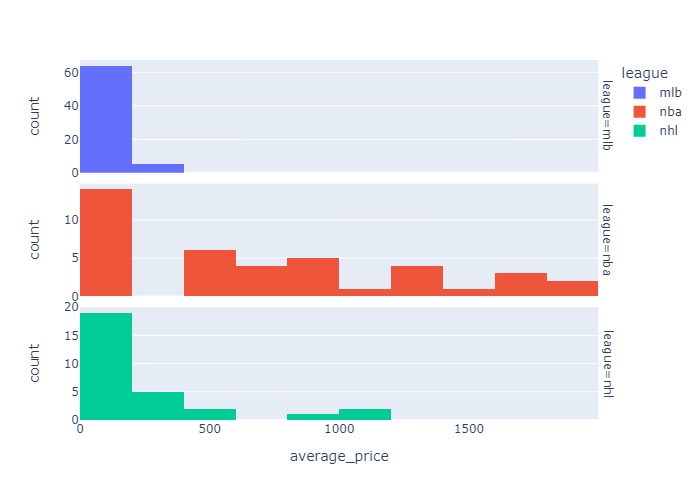

In [8]:
px.histogram(
    df, 
    x = 'average_price',
    facet_row='league',
    color = 'league'
)\
    .update_yaxes(matches=None)\
    .show(renderer='png')

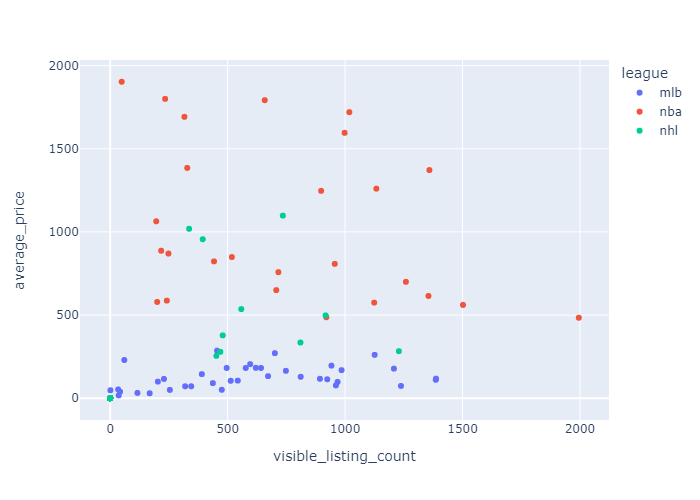

In [9]:
px.scatter(
    df,
    x='visible_listing_count',
    y='average_price',
    color = 'league'
).show(renderer='png')